<a href="https://colab.research.google.com/github/gulierus/VU_RG/blob/main/Random_trees_vs_TabPFN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve
import time

# Instalace TabPFN: pip install tabpfn
try:
    from tabpfn import TabPFNClassifier
    TABPFN_AVAILABLE = True
except ImportError:
    print("TabPFN není nainstalovaný. Spusť: pip install tabpfn")
    TABPFN_AVAILABLE = False

In [ ]:
pip install tabpfn

In [ ]:
np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')

# Generování syntetických dat
# Vytvoříme klasifikační problém s více třídami
n_samples = 900
n_features = 20
n_classes = 7

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=7,
    n_redundant=2,
    n_classes=n_classes,
    n_clusters_per_class=2,
    random_state=42,
    flip_y=0.1  # přidáme šum
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f" Trénovací vzorky: {len(X_train)}")
print(f" Testovací vzorky: {len(X_test)}")
print(f" Počet příznaků: {n_features}")
print(f" Počet tříd: {n_classes}")

 Trénovací vzorky: 630
 Testovací vzorky: 270
 Počet příznaků: 20
 Počet tříd: 7


In [ ]:
# Trénování Decision Tree

dt_start = time.time()
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=7,
    random_state=42
)
dt_model.fit(X_train, y_train)
dt_train_time = time.time() - dt_start

dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_logloss = log_loss(y_test, dt_pred_proba)

print(f" Čas trénování: {dt_train_time:.4f}s")
print(f" Accuracy: {dt_accuracy:.4f}")
print(f" Log Loss: {dt_logloss:.4f}")

# Cross-validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print(f" CV Accuracy (mean±std): {dt_cv_scores.mean():.4f}±{dt_cv_scores.std():.4f}")


 Čas trénování: 0.0207s
 Accuracy: 0.4222
 Log Loss: 17.4614
 CV Accuracy (mean±std): 0.3857±0.0384


In [ ]:
# Trénování Random Forest

rf_start = time.time()
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_train_time = time.time() - rf_start

rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_logloss = log_loss(y_test, rf_pred_proba)

print(f" Čas trénování: {rf_train_time:.4f}s")
print(f" Accuracy: {rf_accuracy:.4f}")
print(f" Log Loss: {rf_logloss:.4f}")

# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f" V Accuracy (mean±std): {rf_cv_scores.mean():.4f}±{rf_cv_scores.std():.4f}")


 Čas trénování: 1.9831s
 Accuracy: 0.5259
 Log Loss: 1.4028
 V Accuracy (mean±std): 0.5381±0.0360


In [ ]:
# V Colab notebooku spusť:
!pip install huggingface-hub --break-system-packages

# Pak:
from huggingface_hub import login
login(token="token")

# Nebo přes CLI:
!huggingface-cli login
# (zadáš token když se zeptá)


⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `hf auth whoami` to get more information or `hf auth logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add t

In [ ]:
if TABPFN_AVAILABLE:
    # Inferenence s TabPFN
    # TabPFN je PRE-TRÉNOVANÝ model

    tabpfn_start = time.time()
    tabpfn_model = TabPFNClassifier(device='cpu')
    tabpfn_model.fit(X_train, y_train)
    tabpfn_fit_time = time.time() - tabpfn_start

    tabpfn_pred = tabpfn_model.predict(X_test)
    tabpfn_pred_proba = tabpfn_model.predict_proba(X_test)

    tabpfn_accuracy = accuracy_score(y_test, tabpfn_pred)
    tabpfn_logloss = log_loss(y_test, tabpfn_pred_proba)

    print(f" Čas inference: {tabpfn_fit_time:.4f}s")
    print(f" Accuracy: {tabpfn_accuracy:.4f}")
    print(f" Log Loss: {tabpfn_logloss:.4f}")

    # TabPFN nemá cross-validation (je už pre-trénovaný)


tabpfn-v2.5-classifier-v2.5_default.ckpt:   0%|          | 0.00/42.9M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/tabpfn/classifier.py:616: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


 Čas inference: 5.8830s
 Accuracy: 0.6852
 Log Loss: 0.9725



SROVNÁNÍ METOD

Metoda                    Čas (s)      Accuracy     Log Loss    
----------------------------------------------------------------------
Decision Tree             0.0207       0.4222       17.4614     
Random Forest             1.9831       0.5259       1.4028      
TabPFN                    5.8830       0.6852       0.9725      


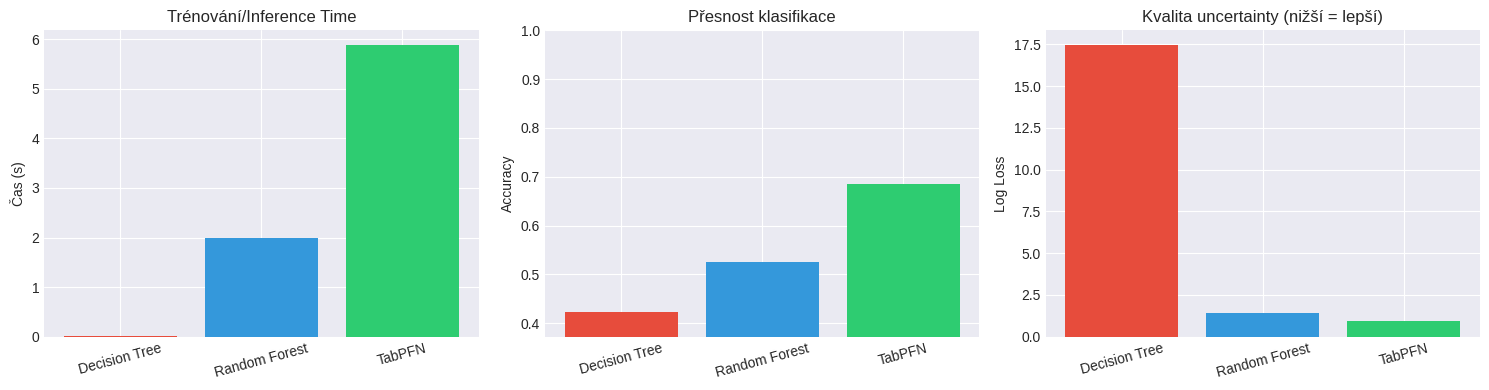

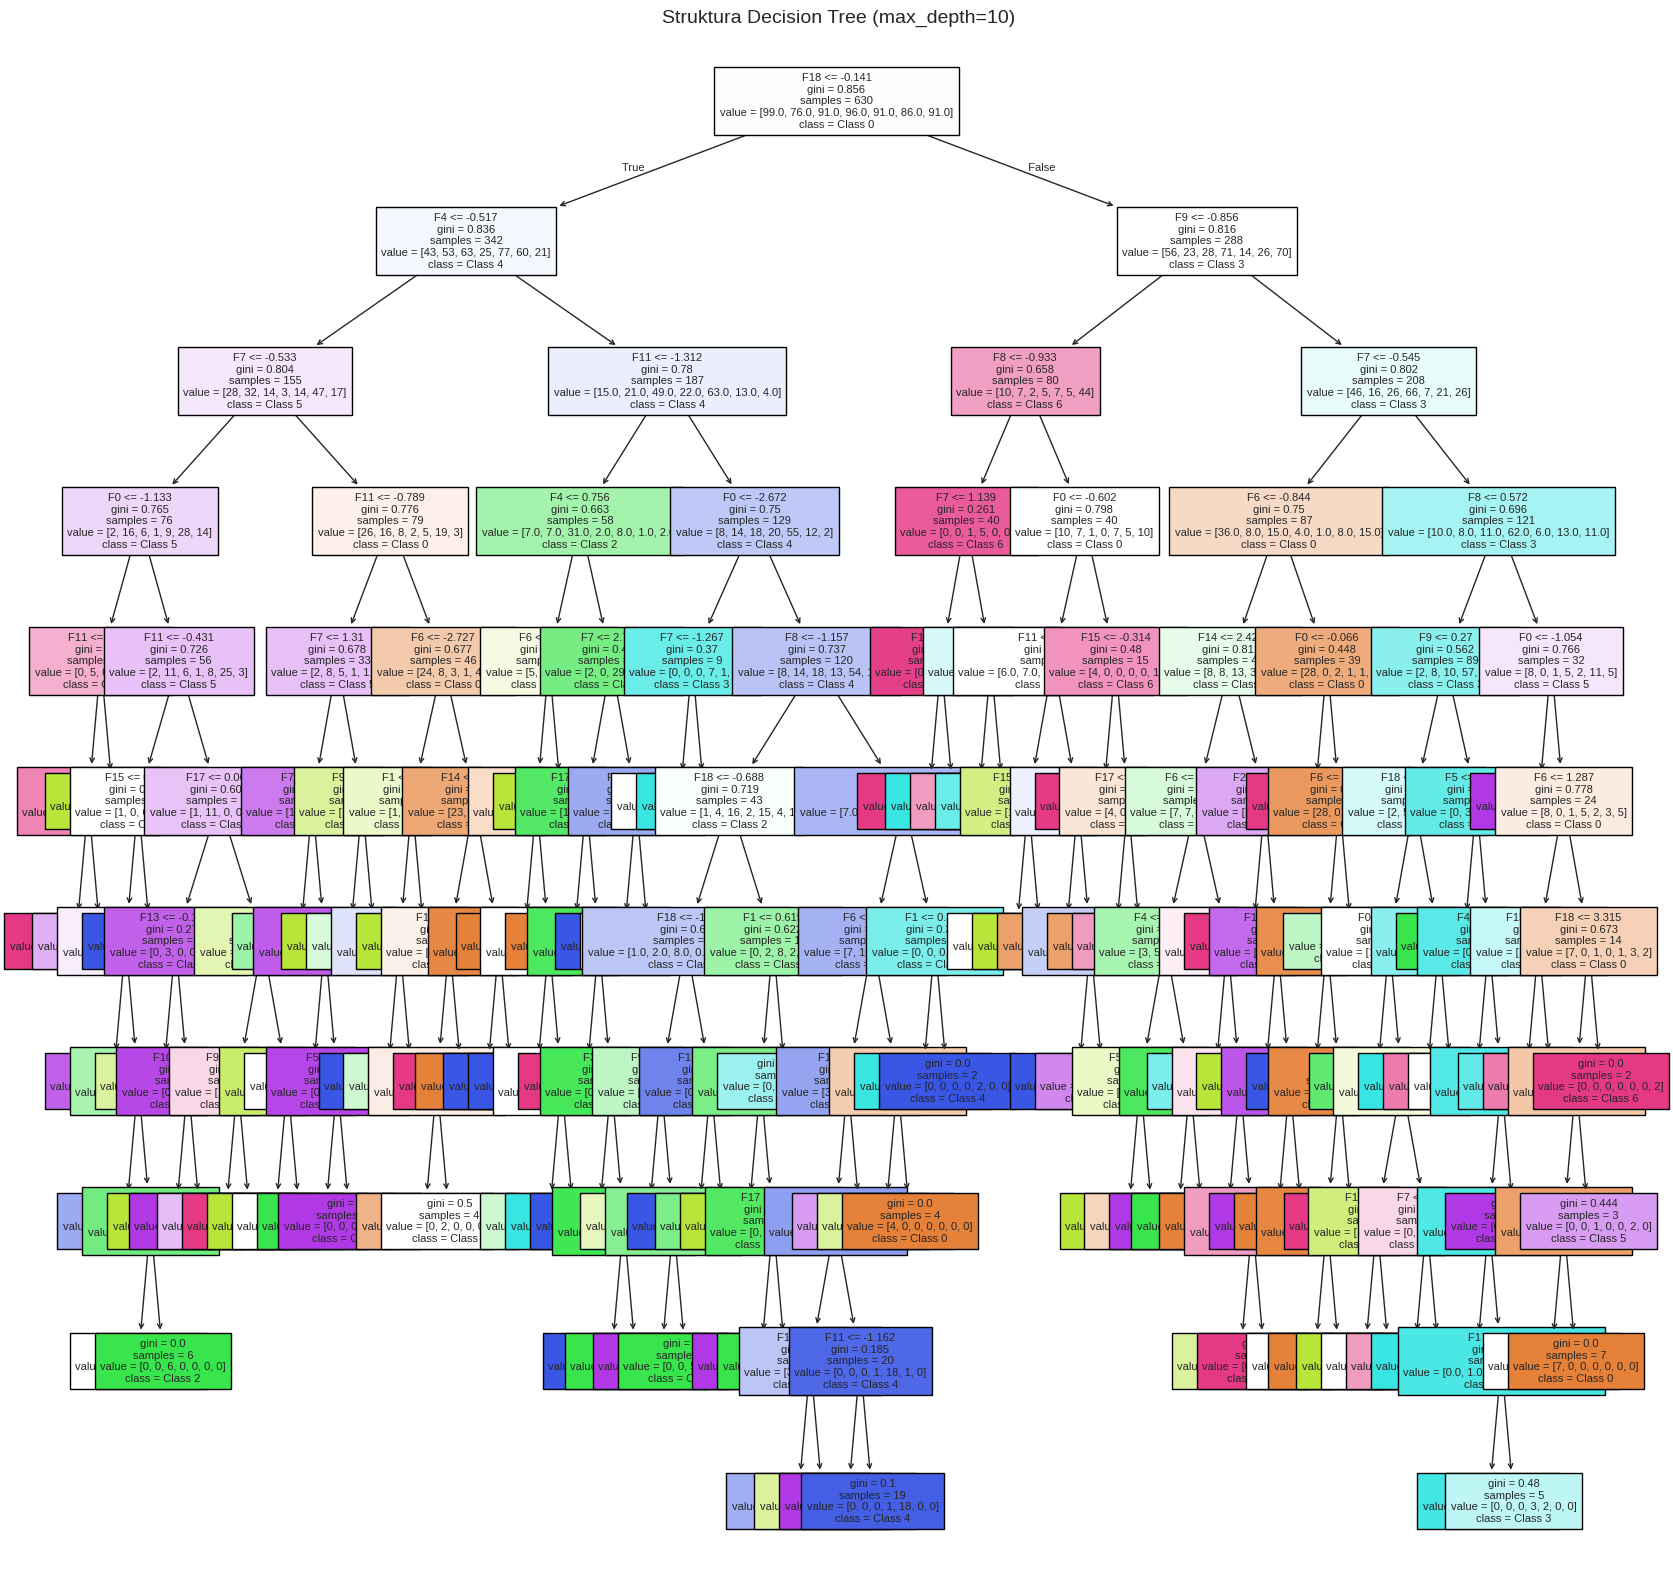

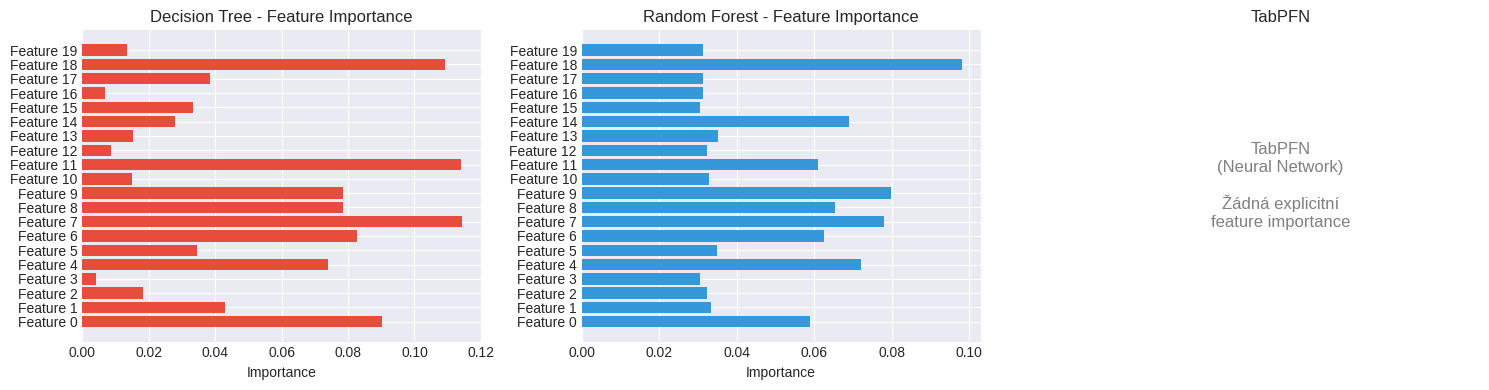

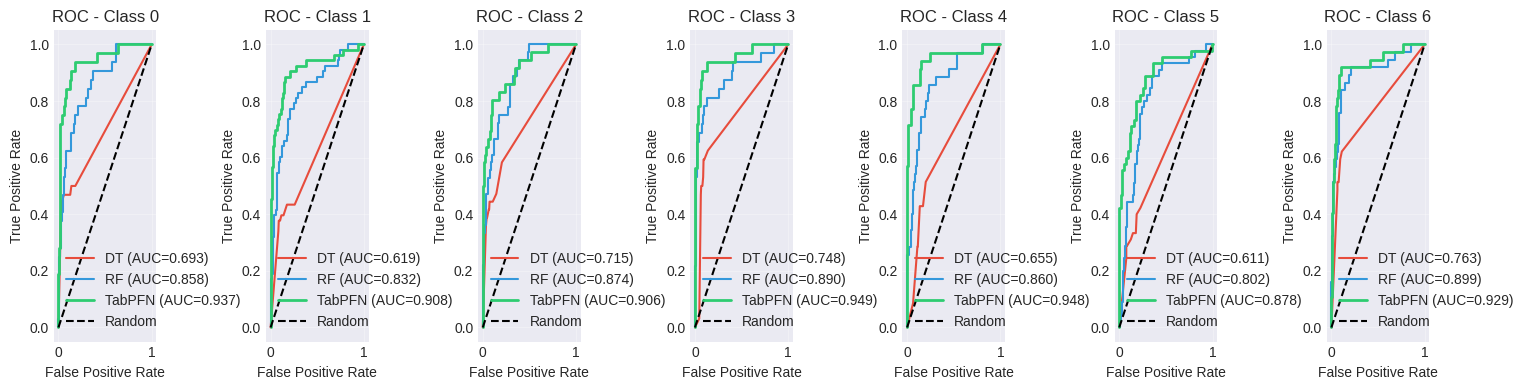

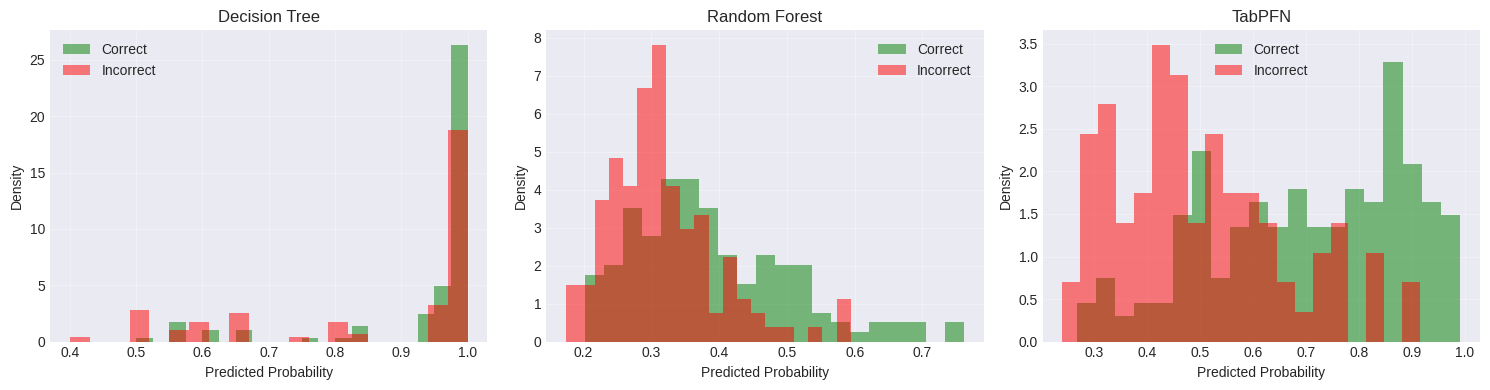

In [ ]:
# Porovnávání výsledků

print("\n" + "=" * 70)
print("SROVNÁNÍ METOD")
print("=" * 70)

print(f"\n{'Metoda':<25} {'Čas (s)':<12} {'Accuracy':<12} {'Log Loss':<12}")
print("-" * 70)
print(f"{'Decision Tree':<25} {dt_train_time:<12.4f} {dt_accuracy:<12.4f} {dt_logloss:<12.4f}")
print(f"{'Random Forest':<25} {rf_train_time:<12.4f} {rf_accuracy:<12.4f} {rf_logloss:<12.4f}")
if TABPFN_AVAILABLE:
    print(f"{'TabPFN':<25} {tabpfn_fit_time:<12.4f} {tabpfn_accuracy:<12.4f} {tabpfn_logloss:<12.4f}")

# Vizualizace

# 6.1 Srovnání metrik
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

methods = ['Decision Tree', 'Random Forest']
colors = ['#e74c3c', '#3498db']
times = [dt_train_time, rf_train_time]
accuracies = [dt_accuracy, rf_accuracy]
loglosses = [dt_logloss, rf_logloss]

if TABPFN_AVAILABLE:
    methods.append('TabPFN')
    colors.append('#2ecc71')
    times.append(tabpfn_fit_time)
    accuracies.append(tabpfn_accuracy)
    loglosses.append(tabpfn_logloss)

# Čas
axes[0].bar(methods, times, color=colors)
axes[0].set_ylabel('Čas (s)')
axes[0].set_title('Trénování/Inference Time')
axes[0].tick_params(axis='x', rotation=15)

# Accuracy
axes[1].bar(methods, accuracies, color=colors)
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Přesnost klasifikace')
axes[1].set_ylim([min(accuracies) - 0.05, 1.0])
axes[1].tick_params(axis='x', rotation=15)

# Log Loss
axes[2].bar(methods, loglosses, color=colors)
axes[2].set_ylabel('Log Loss')
axes[2].set_title('Kvalita uncertainty (nižší = lepší)')
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()

# 6.2 Ukázka decision tree
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(dt_model, filled=True, feature_names=[f'F{i}' for i in range(n_features)],
          class_names=[f'Class {i}' for i in range(n_classes)], ax=ax, fontsize=8)
plt.title('Struktura Decision Tree (max_depth=10)', fontsize=14)

# 6.3 Feature importance
fig, axes = plt.subplots(1, 2 if not TABPFN_AVAILABLE else 3, figsize=(15, 4))

# Decision Tree
axes[0].barh(range(n_features), dt_model.feature_importances_, color='#e74c3c')
axes[0].set_yticks(range(n_features))
axes[0].set_yticklabels([f'Feature {i}' for i in range(n_features)])
axes[0].set_xlabel('Importance')
axes[0].set_title('Decision Tree - Feature Importance')

# Random Forest
axes[1].barh(range(n_features), rf_model.feature_importances_, color='#3498db')
axes[1].set_yticks(range(n_features))
axes[1].set_yticklabels([f'Feature {i}' for i in range(n_features)])
axes[1].set_xlabel('Importance')
axes[1].set_title('Random Forest - Feature Importance')

# TabPFN nemá feature importance (je to neural network)
if TABPFN_AVAILABLE:
    axes[2].text(0.5, 0.5, 'TabPFN\n(Neural Network)\n\nŽádná explicitní\nfeature importance',
                ha='center', va='center', fontsize=12, color='gray')
    axes[2].set_xlim([0, 1])
    axes[2].set_ylim([0, 1])
    axes[2].axis('off')
    axes[2].set_title('TabPFN')

plt.tight_layout()

# 6.4 ROC křivky (binární klasifikace - použijeme one-vs-rest)
fig, axes = plt.subplots(1, n_classes, figsize=(15, 4))

for class_idx in range(n_classes):
    # Vytvoříme binární labels
    y_test_binary = (y_test == class_idx).astype(int)

    # Decision Tree
    fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, dt_pred_proba[:, class_idx])
    auc_dt = roc_auc_score(y_test_binary, dt_pred_proba[:, class_idx])
    axes[class_idx].plot(fpr_dt, tpr_dt, label=f'DT (AUC={auc_dt:.3f})', color='#e74c3c')

    # Random Forest
    fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, rf_pred_proba[:, class_idx])
    auc_rf = roc_auc_score(y_test_binary, rf_pred_proba[:, class_idx])
    axes[class_idx].plot(fpr_rf, tpr_rf, label=f'RF (AUC={auc_rf:.3f})', color='#3498db')

    # TabPFN
    if TABPFN_AVAILABLE:
        fpr_pfn, tpr_pfn, _ = roc_curve(y_test_binary, tabpfn_pred_proba[:, class_idx])
        auc_pfn = roc_auc_score(y_test_binary, tabpfn_pred_proba[:, class_idx])
        axes[class_idx].plot(fpr_pfn, tpr_pfn, label=f'TabPFN (AUC={auc_pfn:.3f})', color='#2ecc71', linewidth=2)

    axes[class_idx].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[class_idx].set_xlabel('False Positive Rate')
    axes[class_idx].set_ylabel('True Positive Rate')
    axes[class_idx].set_title(f'ROC - Class {class_idx}')
    axes[class_idx].legend()
    axes[class_idx].grid(True, alpha=0.3)

plt.tight_layout()

# 6.5 Distribuce pravděpodobností (calibration)
fig, axes = plt.subplots(1, 3 if TABPFN_AVAILABLE else 2, figsize=(15, 4))

# Helper funkce pro histogram
def plot_prob_hist(ax, proba, y_true, title, color):
    # Vezmeme maximum predicted probability
    max_proba = np.max(proba, axis=1)
    correct = (np.argmax(proba, axis=1) == y_true)

    ax.hist(max_proba[correct], bins=20, alpha=0.5, label='Correct', color='green', density=True)
    ax.hist(max_proba[~correct], bins=20, alpha=0.5, label='Incorrect', color='red', density=True)
    ax.set_xlabel('Predicted Probability')
    ax.set_ylabel('Density')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)

plot_prob_hist(axes[0], dt_pred_proba, y_test, 'Decision Tree', '#e74c3c')
plot_prob_hist(axes[1], rf_pred_proba, y_test, 'Random Forest', '#3498db')
if TABPFN_AVAILABLE:
    plot_prob_hist(axes[2], tabpfn_pred_proba, y_test, 'TabPFN', '#2ecc71')

plt.tight_layout()
